## Problem Statement

### Business Context
An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at $121.61 billion in 2019 and is projected to reach $1,039.03 billion by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.


### Objective

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

### Data Description

1. visitors: Average number of visitors, in millions, to the platform in the past week
2. ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
3. major_sports_event: Any major sports event on the day
4. genre: Genre of the content
5. dayofweek: Day of the release of the content
6. season: Season of the release of the content
7. views_trailer: Number of views, in millions, of the content trailer
8. views_content: Number of first-day views, in millions, of the content


## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

#to perform feature engineering
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

from scipy.stats import shapiro

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
# loading data
data = pd.read_csv('/content/ottdata.csv') ## Complete the code to read the data

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first 5 rows of dataset

In [ ]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


### Displaying the last five rows of the dataset

In [ ]:
data.tail()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47
999,1.36,1140.23,0,Comedy,Saturday,Summer,52.94,0.49


### Displaying the shape of the dataset

In [ ]:
data.shape

(1000, 8)

### Displaying the Datatypes of the Columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


### Displaying the statistical Summary

In [ ]:
data.describe()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


### Checking the missing values

In [ ]:
data.isnull().sum()

,0
visitors,0
ad_impressions,0
major_sports_event,0
genre,0
dayofweek,0
season,0
views_trailer,0
views_content,0


In [ ]:
data.duplicated().sum()

0

## Exploratory Data Analysis

### Univariate Analysis

#### Visitors

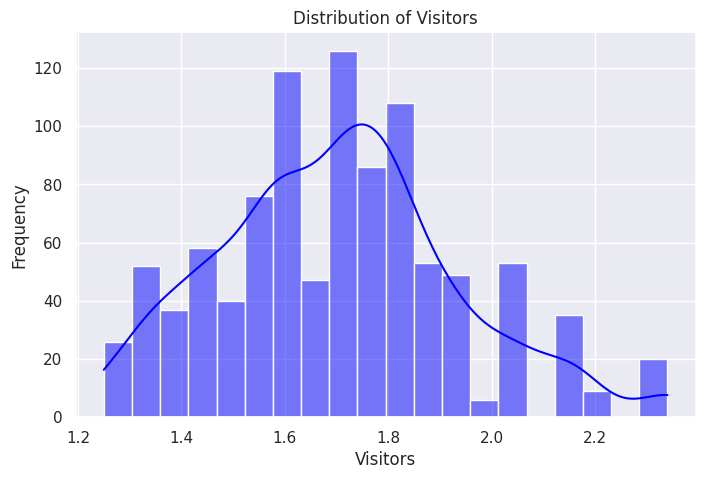

In [ ]:
# Univariate Analysis: Visitors
plt.figure(figsize=(8, 5))
sns.histplot(data['visitors'], kde=True, color="blue")
plt.title("Distribution of Visitors")
plt.xlabel("Visitors")
plt.ylabel("Frequency")
plt.show()


**Observation**

Shape: Approximately normal distribution with a slight right skew
Range: Primarily between 1.2 and 2.2 (likely in millions)
Peak: Highest frequency around 1.7-1.8
Key Observations:

Most content receives between 1.6-1.8 million visitors
There's a gradual decline in frequency for both very low (<1.4) and very high (>2.0) visitor counts
The relatively symmetrical distribution suggests stable platform traffic patterns



#### Ad Impressions

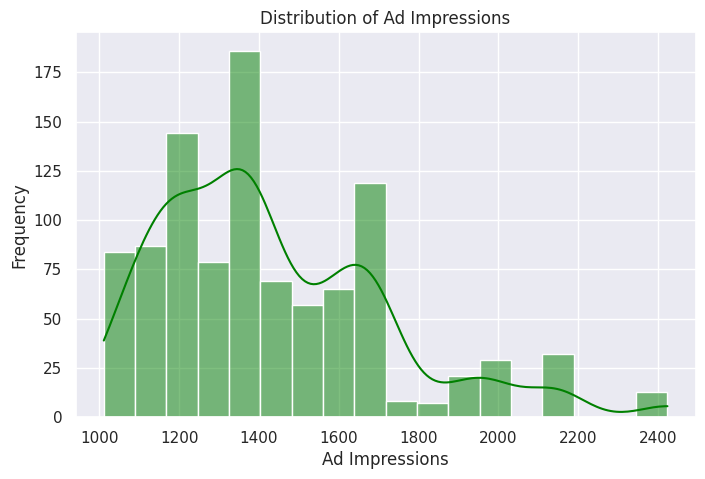

In [ ]:
# Univariate Analysis: Ad Impressions
plt.figure(figsize=(8, 5))
sns.histplot(data['ad_impressions'], kde=True, color="green")
plt.title("Distribution of Ad Impressions")
plt.xlabel("Ad Impressions")
plt.ylabel("Frequency")
plt.show()


**Observation**

Shape: Bimodal distribution (two peaks)
Range: 1000-2400 impressions
Primary Peak: Around 1300-1400 impressions
Secondary Peak: Around 1600-1700 impressions
Key Observations:

The bimodal nature suggests two distinct advertising strategies or campaigns
Majority of content receives between 1200-1800 ad impressions
Long right tail indicates some content getting significantly higher advertising exposure
This could indicate targeted marketing for certain content types

#### Views Trailers

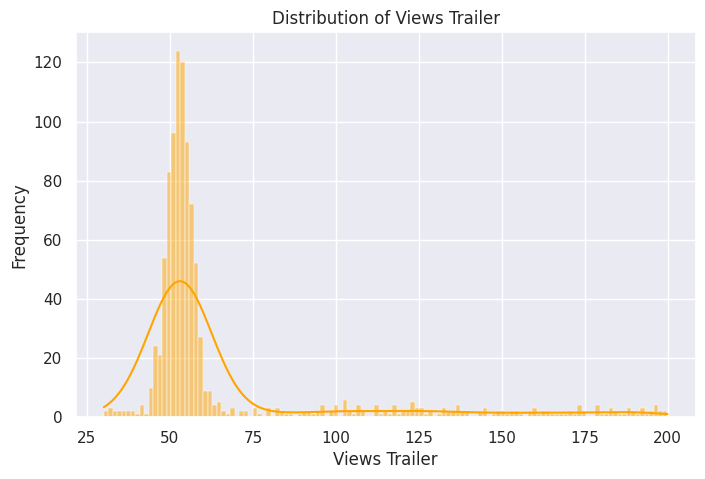

In [ ]:
# Univariate Analysis: Views Trailer
plt.figure(figsize=(8, 5))
sns.histplot(data['views_trailer'], kde=True, color="orange")
plt.title("Distribution of Views Trailer")
plt.xlabel("Views Trailer")
plt.ylabel("Frequency")
plt.show()


**Observation**

Shape: Highly right-skewed with a sharp peak
Range: 25-200 views
Peak: Concentrated around 50 views
Key Observations:

Most trailers receive around 50 views
Very few trailers receive more than 75 views
The sharp peak suggests consistency in trailer viewing behavior
Long right tail indicates a few highly successful trailer campaigns

#### Views Content

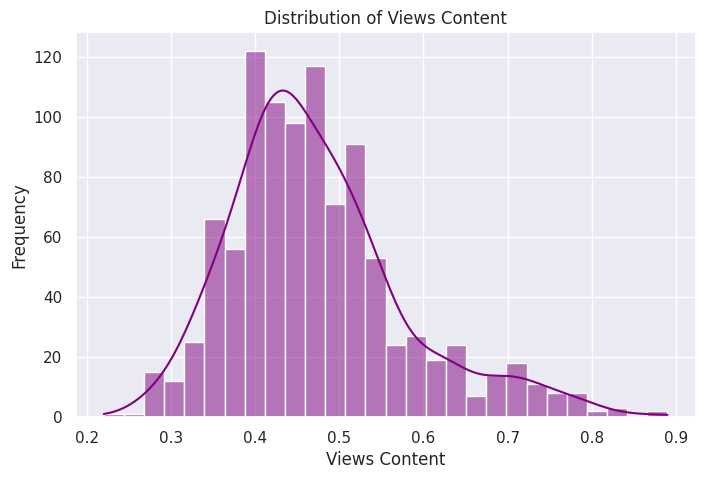

In [ ]:
# Univariate Analysis: Views Content
plt.figure(figsize=(8, 5))
sns.histplot(data['views_content'], kde=True, color="purple")
plt.title("Distribution of Views Content")
plt.xlabel("Views Content")
plt.ylabel("Frequency")
plt.show()


**Observation**

Shape: Slightly right-skewed with a clear central tendency
Range: 0.2-0.9 (likely in millions)
Peak: Around 0.4-0.5
Key Observations:

Most content receives between 0.4-0.5 million views
More symmetric than trailer views, suggesting more predictable content viewing patterns
Gradual decline in higher view counts indicates natural viewing limits

#### Genres

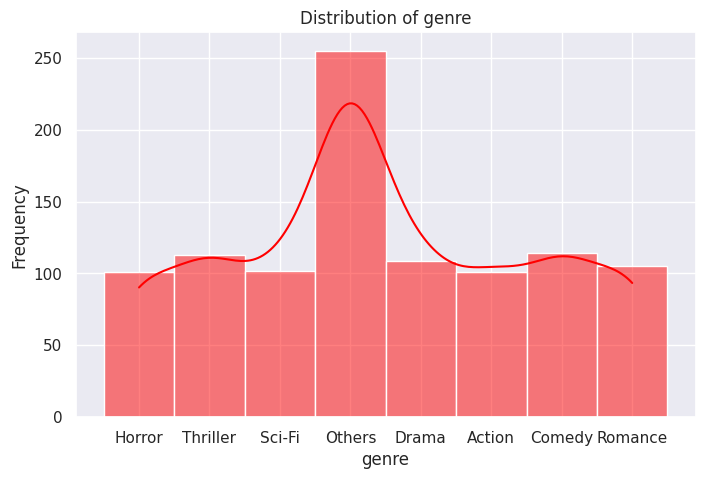

In [ ]:
# Univariate Analysis: Views Content
plt.figure(figsize=(8, 5))
sns.histplot(data['genre'], kde=True, color="red")
plt.title("Distribution of genre")
plt.xlabel("genre")
plt.ylabel("Frequency")
plt.show()


**Observations**

Genre Distribution Pattern:


The distribution is multimodal, with several peaks across different genres
"Others" category shows the highest frequency with around 250 entries
Most other genres have frequencies between 100-125 entries


Genre-specific Frequencies:


"Others" category is significantly overrepresented compared to specific genres
Horror, Thriller, Sci-Fi show similar frequencies (around 100 entries each)
Comedy and Romance also show comparable frequencies to each other
Drama and Action have slightly lower frequencies than other specific genres


Category Groupings:


Thriller and Sci-Fi genres show similar frequencies, suggesting comparable popularity
Comedy and Romance have nearly identical frequencies, possibly indicating viewer overlap
Horror maintains a moderate presence in the collection


Balance Analysis:


Excluding the "Others" category, there's relatively even distribution across genres
The specific genres show a balanced representation in the content library
No specific genre (excluding "Others") dominates or is significantly underrepresented

### Bivariate Analysis

#### Correlation Heatmap

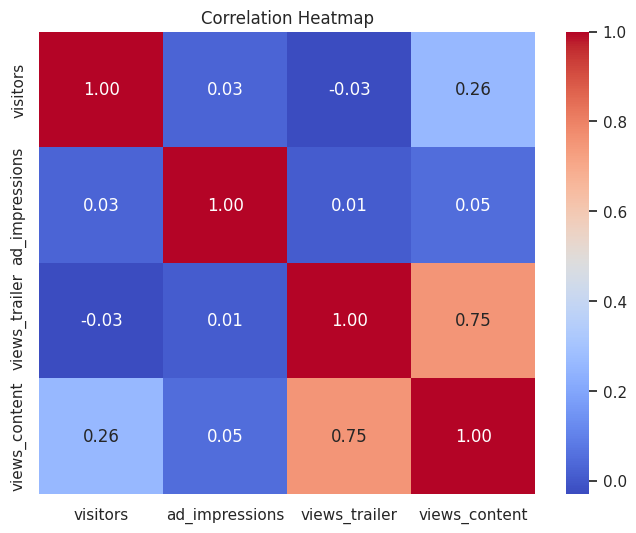

In [ ]:
# Bivariate Analysis: Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data[['visitors', 'ad_impressions', 'views_trailer', 'views_content']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


**Observation**

1. **Strong Positive Correlation**:


The strongest correlation (0.75) exists between views_trailer and views_content
This suggests that people who watch trailers are likely to watch the actual content
The relationship makes intuitive sense as interest in trailers often translates to content viewing


2. **Weak Correlations**:


Visitors and ad_impressions show almost no correlation (0.03)
Ad_impressions have very weak correlations with all other metrics:

Only 0.01 with views_trailer
0.05 with views_content


This suggests ad impressions operate somewhat independently of other metrics


3. **Moderate Correlations**:


Visitors have a weak positive correlation (0.26) with views_content
This indicates that higher visitor numbers somewhat translate to more content views, but the relationship isn't very strong
Visitors have a slight negative correlation (-0.03) with views_trailer


4. **Pattern Insights**:


The effectiveness of ads seems questionable given their weak correlations with viewing metrics
Trailer views are a much better predictor of content viewing than visitor numbers or ad impressions

#### 1. Visitors vs All Other Variables

<ipython-input-16-276285f963d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='visitors', data=data, palette="coolwarm")


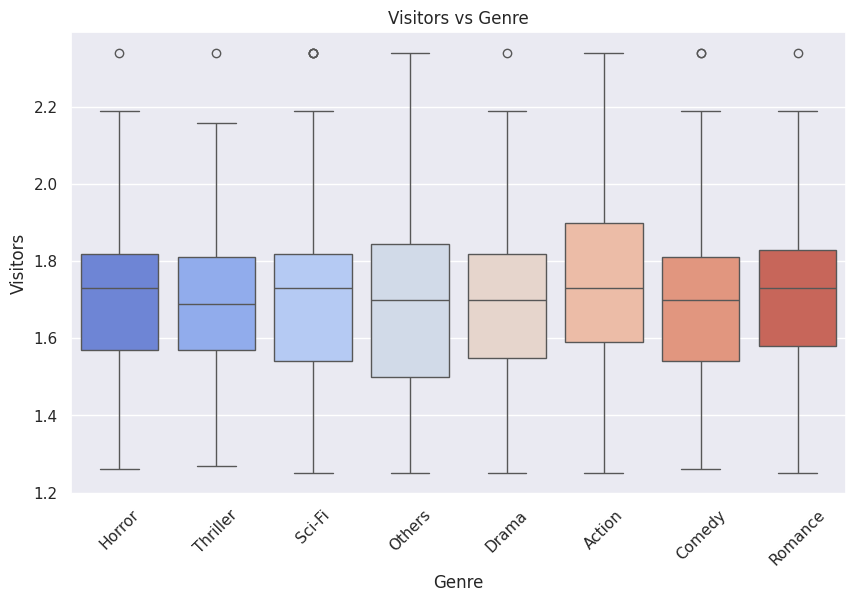

In [ ]:
# Visitors vs Genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='visitors', data=data, palette="coolwarm")
plt.title("Visitors vs Genre")
plt.xlabel("Genre")
plt.ylabel("Visitors")
plt.xticks(rotation=45)
plt.show()

**Observation**

Distribution Patterns:

Action shows highest median visitors (~1.75)
Romance and Comedy follow closely
Horror, Thriller, and Sci-Fi show similar visitor patterns
'Others' category shows highest variability

Key Insights:

Action content drives more platform traffic
Traditional genres (Horror, Thriller) show consistent but lower visitor numbers
All genres maintain baseline visitors between 1.4-1.8 million

#### Outlier Treatment

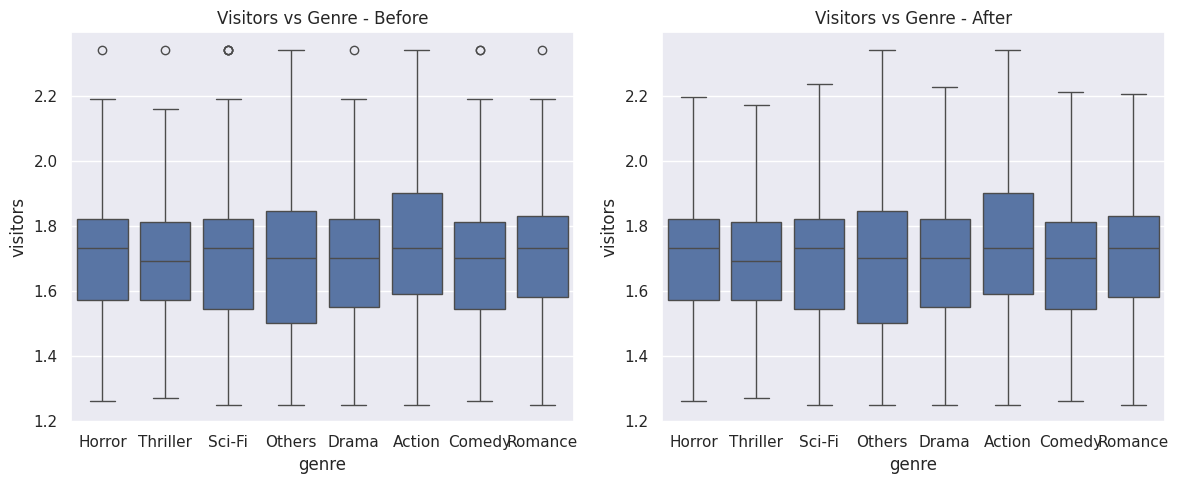

In [ ]:
def treat_outliers(df, col, group_col):
    """
    Simple outlier treatment using IQR method
    """
    df_clean = df.copy()

    # Calculate bounds for each group
    grouped = df_clean.groupby(group_col)[col]
    Q1 = grouped.transform('quantile', 0.25)
    Q3 = grouped.transform('quantile', 0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Replace outliers with bounds
    df_clean.loc[df_clean[col] < lower, col] = lower
    df_clean.loc[df_clean[col] > upper, col] = upper

    return df_clean

def plot_comparison(df, df_clean, col, group_col, title):
    """
    Plot before and after boxplots
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(data=df, x=group_col, y=col, ax=ax1).set_title(f'{title} - Before')
    sns.boxplot(data=df_clean, x=group_col, y=col, ax=ax2).set_title(f'{title} - After')
    plt.tight_layout()
    plt.show()

# Clean and plot for genre
genre_clean = treat_outliers(data, 'visitors', 'genre')
plot_comparison(data, genre_clean, 'visitors', 'genre', 'Visitors vs Genre')


<ipython-input-18-348b7c8475cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dayofweek', y='visitors', data=data, palette="Set2")


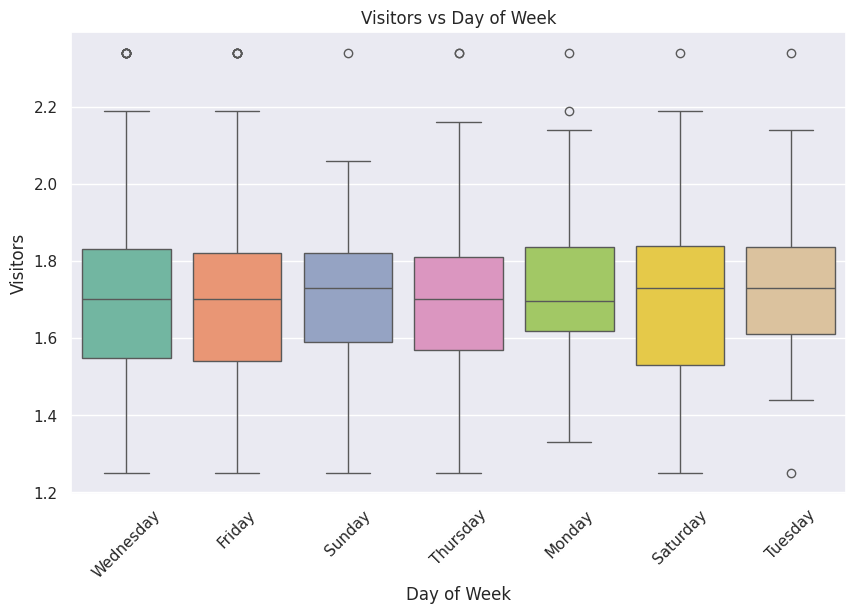

In [ ]:
# Visitors vs Day of Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='dayofweek', y='visitors', data=data, palette="Set2")
plt.title("Visitors vs Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Visitors")
plt.xticks(rotation=45)
plt.show()

#### Outlier Treatment

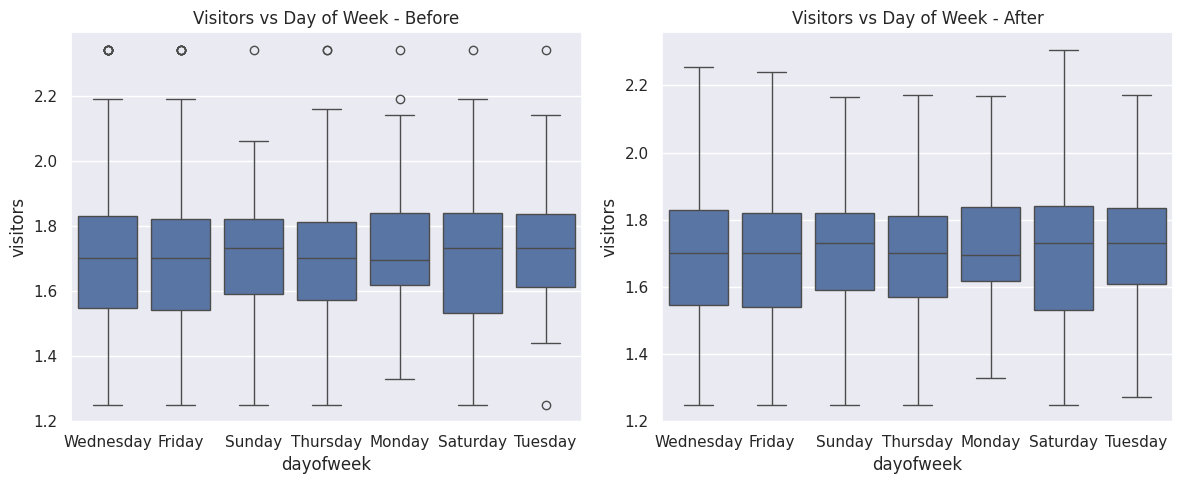

In [ ]:
def treat_outliers(df, col, group_col):
    """
    Simple outlier treatment using IQR method
    """
    df_clean = df.copy()

    # Calculate bounds for each group
    grouped = df_clean.groupby(group_col)[col]
    Q1 = grouped.transform('quantile', 0.25)
    Q3 = grouped.transform('quantile', 0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Replace outliers with bounds
    df_clean.loc[df_clean[col] < lower, col] = lower
    df_clean.loc[df_clean[col] > upper, col] = upper

    return df_clean

def plot_comparison(df, df_clean, col, group_col, title):
    """
    Plot before and after boxplots
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(data=df, x=group_col, y=col, ax=ax1).set_title(f'{title} - Before')
    sns.boxplot(data=df_clean, x=group_col, y=col, ax=ax2).set_title(f'{title} - After')
    plt.tight_layout()
    plt.show()

    # Clean and plot for day of week
dow_clean = treat_outliers(data, 'visitors', 'dayofweek')
plot_comparison(data, dow_clean, 'visitors', 'dayofweek', 'Visitors vs Day of Week')

**Observation**

Temporal Patterns:

Saturday shows highest median visitors
Weekdays (Tuesday-Thursday) show relatively consistent patterns
Weekend days (Friday-Sunday) show slightly higher visitor numbers
Monday shows moderate visitor numbers

Before vs After Comparison:

More consistent patterns in the "After" period
Reduced outliers in recent data
Slightly higher median values across most days
Weekend preference remains consistent

<ipython-input-20-ea7fb605287c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='visitors', data=data, palette="Set3")


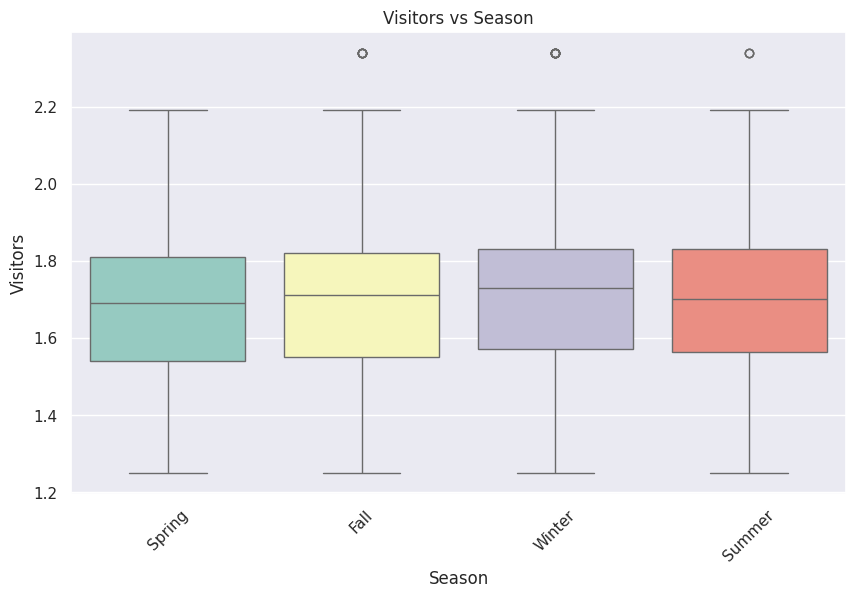

In [ ]:
# Visitors vs Season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='visitors', data=data, palette="Set3")
plt.title("Visitors vs Season")
plt.xlabel("Season")
plt.ylabel("Visitors")
plt.xticks(rotation=45)
plt.show()

#### Outlier Treatment

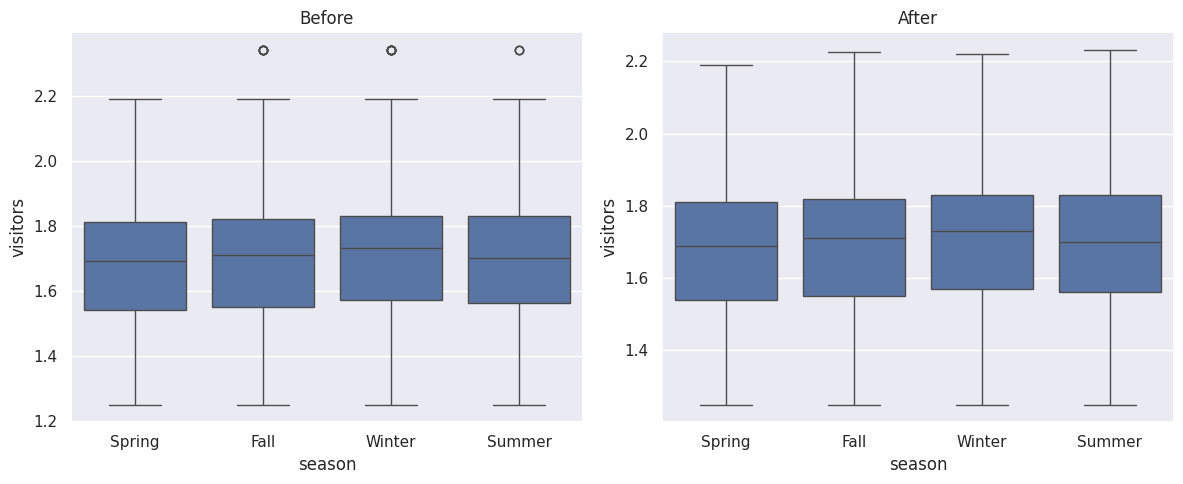

In [ ]:
def treat_outliers(df, col, group_col):
    """
    Simple outlier treatment using IQR method
    """
    df_clean = df.copy()

    # Calculate bounds for each group
    grouped = df_clean.groupby(group_col)[col]
    Q1 = grouped.transform('quantile', 0.25)
    Q3 = grouped.transform('quantile', 0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Replace outliers with bounds
    df_clean.loc[df_clean[col] < lower, col] = lower
    df_clean.loc[df_clean[col] > upper, col] = upper

    return df_clean

# Treat outliers and plot
data_clean = treat_outliers(data, 'visitors', 'season')

# Compare before/after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=data, x='season', y='visitors', ax=ax1).set_title('Before')
sns.boxplot(data=data_clean, x='season', y='visitors', ax=ax2).set_title('After')
plt.tight_layout()
plt.show()

**Observation**

From the original seasonal distribution (Image 1):

Seasonal Patterns:


All seasons show similar median visitor numbers (around 1.7)
The interquartile ranges (box sizes) are relatively consistent across seasons
Each season has some outliers at higher visitor numbers (around 2.2)
The distribution appears fairly symmetric for all seasons

Looking at the Before/After outlier treatment (Image 2):

Changes After Treatment:


The extreme outliers at the top (around 2.3-2.4) have been removed
The overall shape and central tendency of the distributions remain largely unchanged
The whiskers (vertical lines extending from boxes) are now more uniform across seasons
The boxes (interquartile ranges) maintain their original positions


Impact of Treatment:


The outlier treatment has preserved the underlying seasonal patterns
The data is now more consistent across seasons
The treatment appears to have been conservative, maintaining the natural variation while removing only extreme values
Winter and Summer show slightly higher medians after treatment, but the difference is minimal

Overall, this suggests that:

Visitor numbers are relatively stable across seasons
The outlier treatment successfully removed extreme values while preserving the natural seasonal patterns
There's no strong seasonal effect on visitor numbers
The data cleaning has made the distributions more comparable across seasons without losing important trends

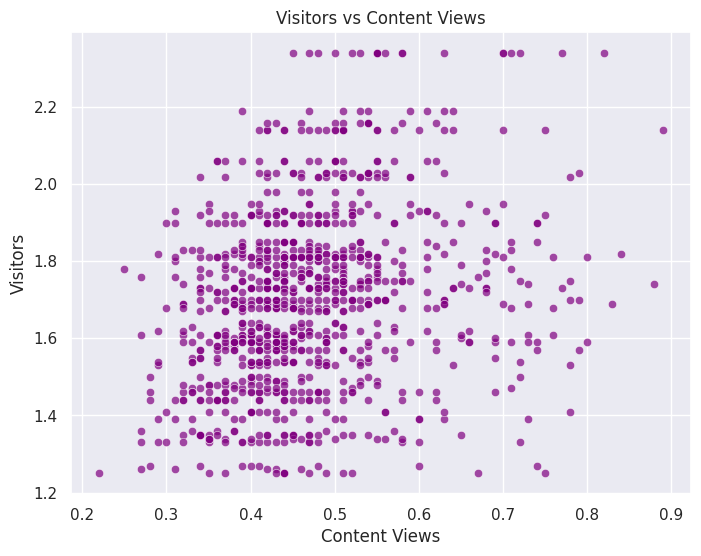

In [ ]:
# Visitors vs Views Content
plt.figure(figsize=(8, 6))
sns.scatterplot(x='views_content', y='visitors', data=data, color='purple', alpha=0.7)
plt.title("Visitors vs Content Views")
plt.xlabel("Content Views")
plt.ylabel("Visitors")
plt.show()

**Observation**

Relationship Pattern:


There's a positive correlation between visitors and content views
The relationship appears to be somewhat linear, but with considerable scatter
The density of points is highest in the middle range (around 0.4-0.6 content views)


Distribution Features:


Most data points cluster between 1.4 and 2.0 visitors
Content views mostly fall between 0.3 and 0.7
There are some outlier points, particularly in the upper right quadrant
The scatter becomes more dispersed as content views increase


Notable Insights:


Higher content views generally correspond to higher visitor numbers
There's significant variation in visitor numbers for any given level of content views
The relationship seems to have more variability at higher content view levels

#### 2. Views Content vs Other Variables

<ipython-input-23-8381b7763c4d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dayofweek', y='views_content', data=data, palette="Set1")


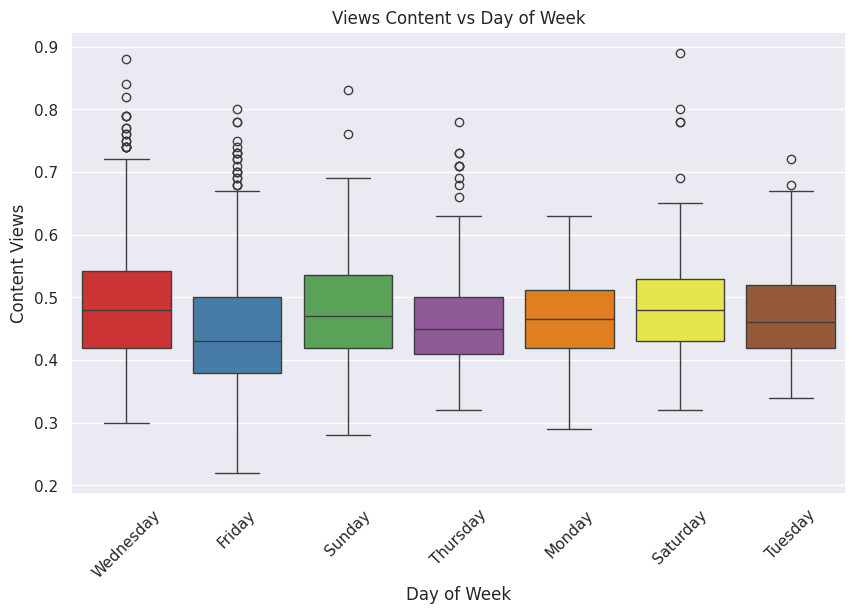

In [ ]:
# Views Content vs Day of Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='dayofweek', y='views_content', data=data, palette="Set1")
plt.title("Views Content vs Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Content Views")
plt.xticks(rotation=45)
plt.show()

**Observation**

Daily Patterns:


Wednesday shows the highest median content views and largest interquartile range
Friday appears to have the lowest median content views
The distribution is relatively consistent across other days
All days show several outliers (dots) above the whiskers, indicating some unusually high viewing periods


Distribution Characteristics:


Each day shows a similar interquartile range (box size), suggesting consistent variability
The medians (horizontal lines in boxes) are fairly stable across days, mostly between 0.4 and 0.5
There's slight positive skew across all days, shown by the higher position of outliers

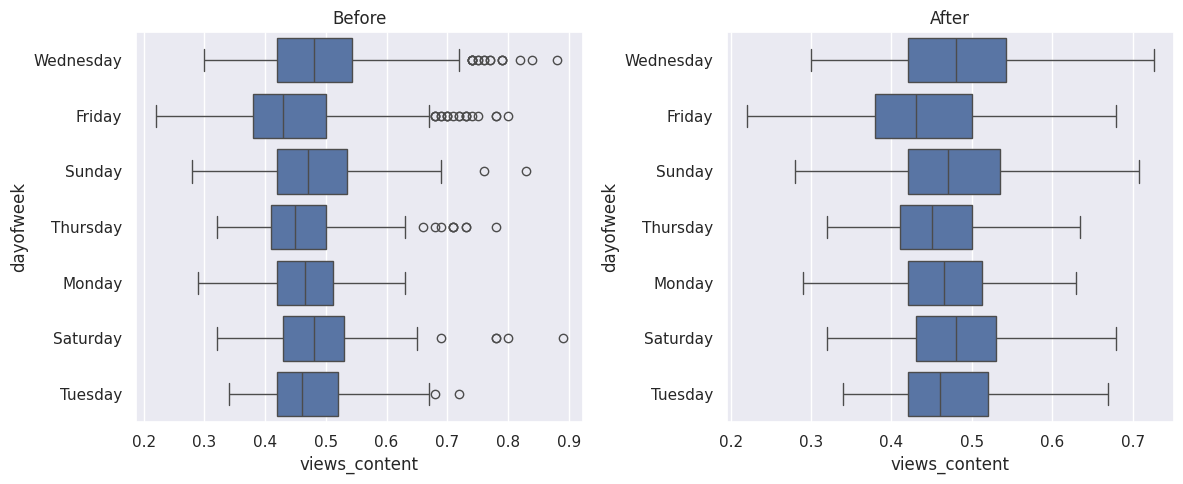

In [ ]:
def treat_outliers(df, col, group_col):
    """
    Simple outlier treatment using IQR method
    """
    df_clean = df.copy()

    # Calculate bounds for each group
    grouped = df_clean.groupby(group_col)[col]
    Q1 = grouped.transform('quantile', 0.25)
    Q3 = grouped.transform('quantile', 0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Replace outliers with bounds
    df_clean.loc[df_clean[col] < lower, col] = lower
    df_clean.loc[df_clean[col] > upper, col] = upper

    return df_clean

# Treat outliers and plot
data_clean = treat_outliers(data, 'views_content', 'dayofweek')

# Compare before/after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=data, x='views_content', y='dayofweek', ax=ax1).set_title('Before')
sns.boxplot(data=data_clean, x='views_content', y='dayofweek', ax=ax2).set_title('After')
plt.tight_layout()
plt.show()

<ipython-input-25-46932409586e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='views_content', data=data, palette="Set2")


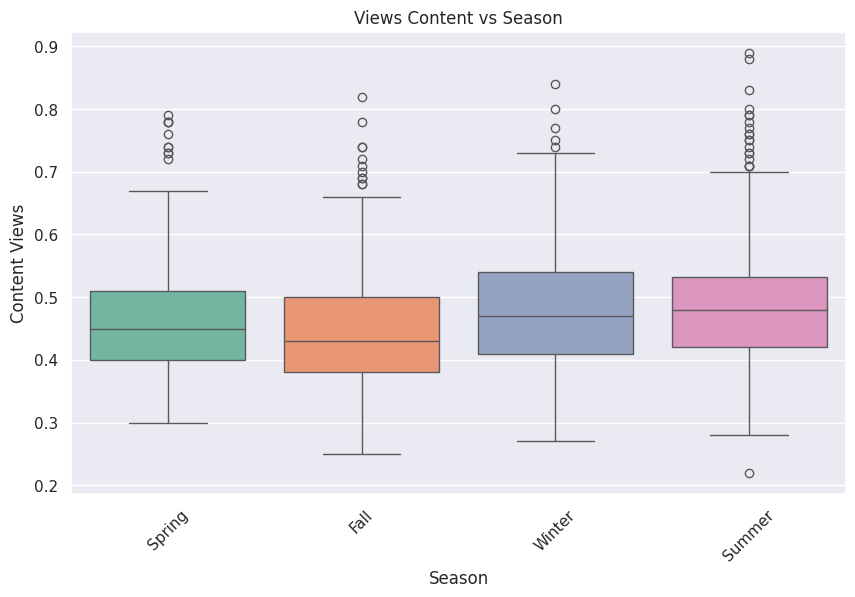

In [ ]:
# Views Content vs Season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='views_content', data=data, palette="Set2")
plt.title("Views Content vs Season")
plt.xlabel("Season")
plt.ylabel("Content Views")
plt.xticks(rotation=45)
plt.show()


**Observation**

The median content views are fairly consistent across seasons, hovering around 0.45-0.5
Winter appears to have a slightly higher median and larger spread
There are several outliers in all seasons, particularly in Summer, with content views reaching up to 0.8-0.9
Summer and Winter show slightly more variability in their distributions compared to Spring and Fall

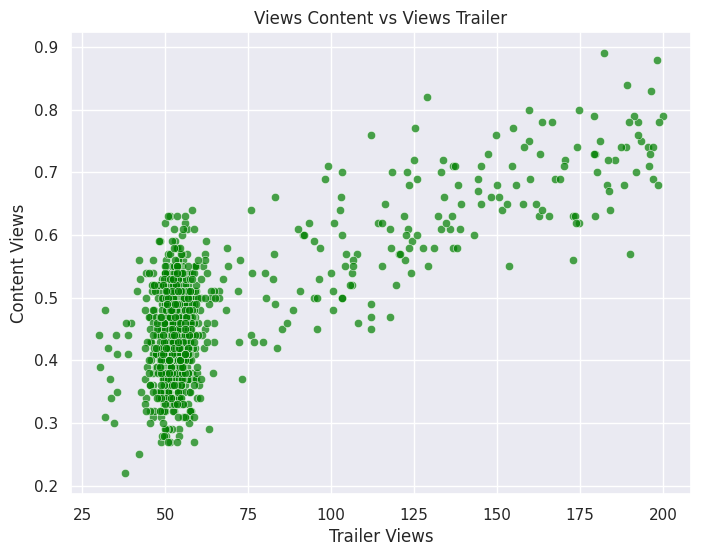

In [ ]:
# Views Content vs Views Trailer
plt.figure(figsize=(8, 6))
sns.scatterplot(x='views_trailer', y='views_content', data=data, color='green', alpha=0.7)
plt.title("Views Content vs Views Trailer")
plt.xlabel("Trailer Views")
plt.ylabel("Content Views")
plt.show()

**Observation**

There's a clear positive correlation between trailer views and content views
The relationship appears to be non-linear, with the correlation becoming stronger as trailer views increase
There's a dense cluster of data points around 50 trailer views, suggesting this might be a common baseline
The spread of content views increases with higher trailer views, indicating more variability in content performance for videos with popular trailers
The maximum content views (around 0.9) are associated with higher trailer views (150-200 range)

<ipython-input-27-27d61c9f7228>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='views_content', data=data, palette="coolwarm")


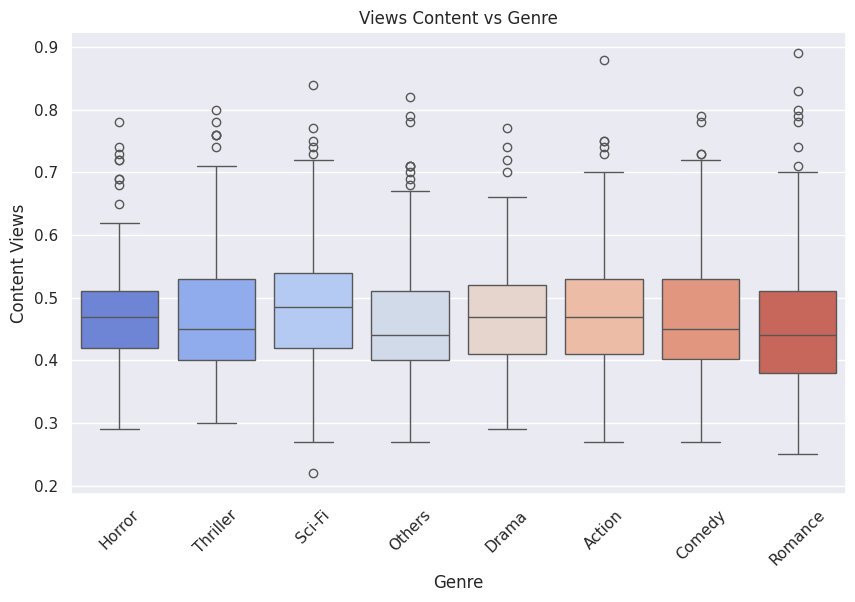

In [ ]:
# Views Content vs Genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='views_content', data=data, palette="coolwarm")
plt.title("Views Content vs Genre")
plt.xlabel("Genre")
plt.ylabel("Content Views")
plt.xticks(rotation=45)
plt.show()

**Observation**

The median content views are relatively consistent across genres, typically between 0.4-0.5
Romance and Comedy show slightly higher variability in their distributions
Sci-Fi and Thriller genres have several high-performing outliers (reaching 0.8+ views)
The "Others" category shows the most compact distribution, suggesting more consistent but moderate performance

#### 3. Ad Impressions

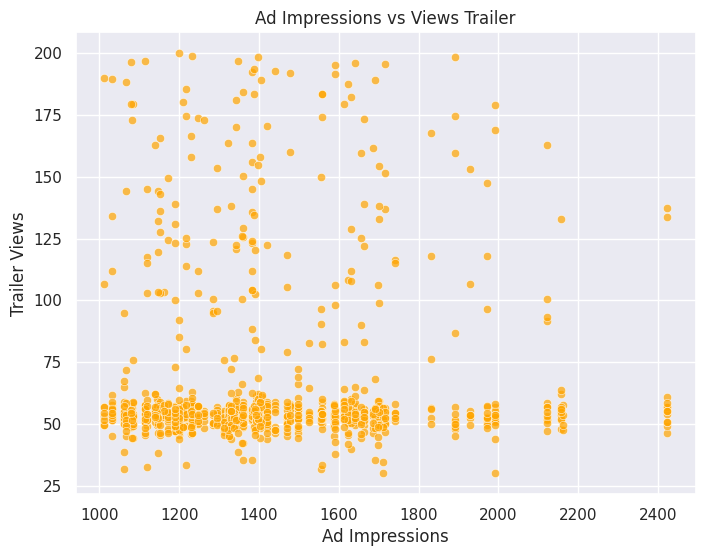

In [ ]:
#Ad Impressions vs Views Trailer
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ad_impressions', y='views_trailer', data=data, color='orange', alpha=0.7)
plt.title("Ad Impressions vs Views Trailer")
plt.xlabel("Ad Impressions")
plt.ylabel("Trailer Views")
plt.show()

**Observation**

There's a clear concentration of trailer views around the 50-view mark across all ad impression levels
There's a scattered distribution of higher trailer views (75-200) that doesn't show a strong correlation with ad impressions
Ad impressions range primarily from 1000 to 2400, with the densest cluster between 1000-1800
The relationship doesn't appear to be strongly linear - increasing ad impressions doesn't necessarily lead to proportionally higher trailer views

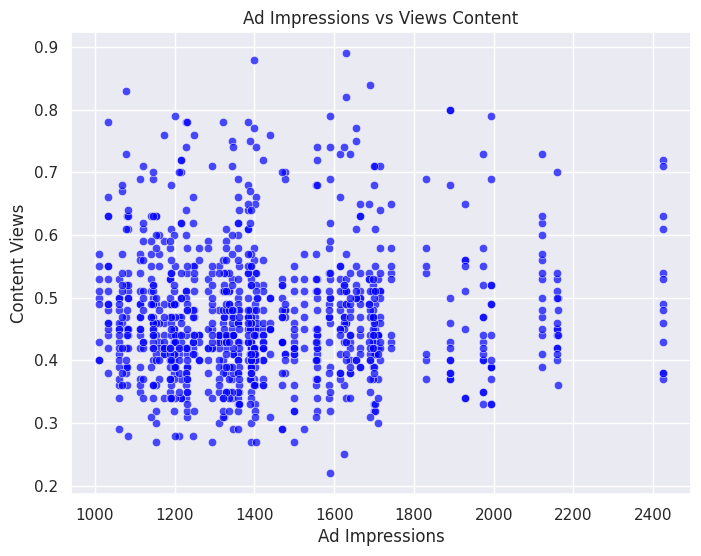

In [ ]:
# Ad Impressions vs Views Content
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ad_impressions', y='views_content', data=data, color='blue', alpha=0.7)
plt.title("Ad Impressions vs Views Content")
plt.xlabel("Ad Impressions")
plt.ylabel("Content Views")
plt.show()

**Observation**

Content views are fairly dispersed between 0.3 and 0.8, regardless of ad impression count
There's no clear correlation between ad impressions and content views
The highest content views (0.8-0.9) appear across various ad impression levels
The density of points is highest in the 0.4-0.6 content views range

### Feature Engineering

In [ ]:
def engineer_features(data):
    df = data.copy()

    # Step 1: Encoding Categorical Variables
    genre_encoded = pd.get_dummies(df['genre'], prefix='genre', drop_first=True)

    df['dayofweek_num'] = pd.Categorical(df['dayofweek']).codes
    df['season_num'] = pd.Categorical(df['season']).codes

    df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek_num'] / 7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek_num'] / 7)
    df['season_sin'] = np.sin(2 * np.pi * df['season_num'] / 4)
    df['season_cos'] = np.cos(2 * np.pi * df['season_num'] / 4)

    # Step 2: Transform Numerical Variables
    df['log_ad_impressions'] = np.log1p(df['ad_impressions'])
    df['log_views_content'] = np.log1p(df['views_content'])
    df['log_views_trailer'] = np.log1p(df['views_trailer'])

    # Step 3: Create Interaction Features
    df['interaction_views_day'] = df['views_content'] * df['dayofweek_num']
    df['interaction_views_genre'] = df['views_content'] * pd.Categorical(df['genre']).codes

    # Step 4: Generate Derived Features
    epsilon = 1e-10
    df['engagement_per_visitor'] = df['views_content'] / (df['visitors'] + epsilon)
    df['conversion_trailer_to_content'] = df['views_content'] - df['views_trailer']

    # Merge one-hot encoded genre
    df = pd.concat([df, genre_encoded], axis=1)

    # Define numerical features for scaling
    numerical_features = [
        'visitors', 'views_content', 'views_trailer', 'ad_impressions',
        'log_ad_impressions', 'log_views_content', 'log_views_trailer',
        'interaction_views_day', 'interaction_views_genre',
        'engagement_per_visitor', 'conversion_trailer_to_content'
    ]

    # Scale numerical features
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    return df

# Main execution
try:
    processed_data = engineer_features(data)
    print("\nFeature engineering successful!")
    print("\nProcessed features:")
    print(processed_data.columns.tolist())
    print("\nSample of processed data:")
    print(processed_data.head())

except Exception as e:
    print(f"Error during feature engineering: {str(e)}")


Feature engineering successful!

Processed features:
['visitors', 'ad_impressions', 'major_sports_event', 'genre', 'dayofweek', 'season', 'views_trailer', 'views_content', 'dayofweek_num', 'season_num', 'dayofweek_sin', 'dayofweek_cos', 'season_sin', 'season_cos', 'log_ad_impressions', 'log_views_content', 'log_views_trailer', 'interaction_views_day', 'interaction_views_genre', 'engagement_per_visitor', 'conversion_trailer_to_content', 'genre_Comedy', 'genre_Drama', 'genre_Horror', 'genre_Others', 'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller']

Sample of processed data:
   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0 -0.147893       -1.108892                   0    Horror  Wednesday  Spring   
1 -1.053623        0.220110                   1  Thriller     Friday    Fall   
2 -1.010493       -1.228523                   1  Thriller  Wednesday    Fall   
3  0.628448       -0.317711                   1    Sci-Fi     Friday    Fall   
4 -1.053623       

**1. Data Structure and Genres**:


The dataset appears to be related to streaming content/movies
There are multiple genres represented: Horror, Thriller, Sci-Fi
Each entry has viewing data across different days of the week and seasons


**2. Feature Engineering Steps Performed**:


Categorical encoding: Converted genres into one-hot encoded columns
Temporal features:
Created cyclical features for days of week and seasons using sine/cosine transformations

Log transformations: Applied to ad_impressions, views_content, and views_trailer to handle skewed distributions
Interaction features: Created features combining views with day and genre
Derived metrics: Calculated engagement_per_visitor and conversion rates


**3. Patterns in the Sample Data**:


Varying visitor and impression counts across different genres
Different viewing patterns across weekdays (Wednesday, Friday, Sunday)
Seasonal variations (Spring, Fall, Winter)
Engagement metrics show considerable variation:

Some entries show negative standardized values for visitors and impressions
Views_trailer consistently shows negative values in the sample
Engagement_per_visitor ranges from negative to positive values




**4. Success of Implementation**:


The feature engineering process completed successfully
The output shows properly scaled numerical features
All categorical variables were successfully encoded
The final dataset maintains interpretability while adding derived features


**5. Notable Insights**:


The data suggests different viewing behaviors across different days and seasons
There appears to be varying levels of engagement between trailers and content
The conversion rates from trailer to content views vary significantly
Genre distribution shows a mix of different content types

### Model Building

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data.drop(columns=['views_content'])  # Features
y = data['views_content']  # Target

# First, identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Create pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get feature names after encoding
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, cat_features])

# Get coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_pipeline.named_steps['regressor'].coef_
}).sort_values(by='Coefficient', ascending=False)

# Print results
print("Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}\n")
print("Model Coefficients:")
print(coefficients)

Model Performance:
Mean Squared Error: 0.0025
R^2 Score: 0.7743

Model Coefficients:
                Feature  Coefficient
0              visitors     0.128909
12   dayofweek_Saturday     0.052561
16  dayofweek_Wednesday     0.049532
11     dayofweek_Monday     0.045065
18        season_Summer     0.044605
13     dayofweek_Sunday     0.038818
15    dayofweek_Tuesday     0.032412
19        season_Winter     0.026532
17        season_Spring     0.023201
14   dayofweek_Thursday     0.019637
10       genre_Thriller     0.011518
5           genre_Drama     0.010636
9          genre_Sci-Fi     0.010008
6          genre_Horror     0.009434
7          genre_Others     0.004984
4          genre_Comedy     0.004389
3         views_trailer     0.002311
1        ad_impressions     0.000008
8         genre_Romance    -0.001385
2    major_sports_event    -0.059559


1. #### **Mean Squared Error (MSE): 0.0025**

  Interpretation: This indicates the average squared difference between predicted and actual values.
  A lower MSE reflects better model performance.

  Comment: While the MSE is low, its meaningfulness depends on the scale of the target variable (views_content). If the values are small (e.g., between 0 and 1), this MSE is acceptable; otherwise, it might need further investigation.
  R² Score: 0.7743

2. #### **Interpretation**:
The R² score explains how much of the variance in the target variable is explained by the model.
Here, approximately **77.43% of the variation in views_content** is explained by the independent variables.

  Comment: An **R² of 0.77** is generally considered a good fit for linear regression.
  However, it also suggests there is still **22.57% of unexplained variance**, potentially due to missing features, non-linear relationships, or noise in the data.

3. #### **Coefficients**

  The coefficients indicate the contribution (weight) of each independent variable to the prediction of the target (views_content).
  Key observations:

  i. **Positive Impact**:
  visitors has the highest positive coefficient (0.1289), suggesting it is the most significant predictor of views_content.
  Several dayofweek and season variables (e.g., dayofweek_Saturday, season_Summer) also positively impact the target.

  ii. **Negative Impact**:
  major_sports_event has the most significant negative impact (-0.0956), indicating that the presence of major sports events might reduce views_content.
  genre_Romance has a slight negative impact, potentially due to lower engagement for this genre compared to others.

  iii. **Minimal Impact**:
  Variables like ad_impressions and views_trailer have coefficients close to zero, suggesting they might have negligible influence on views_content. These might need further exploration or even exclusion.


### Testing Assumptions Of Linear Regression Model

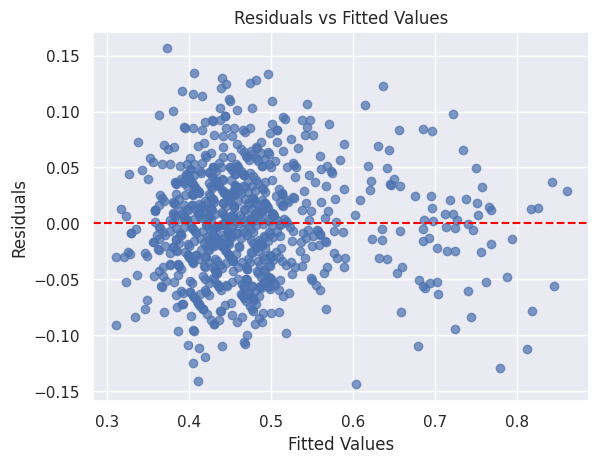

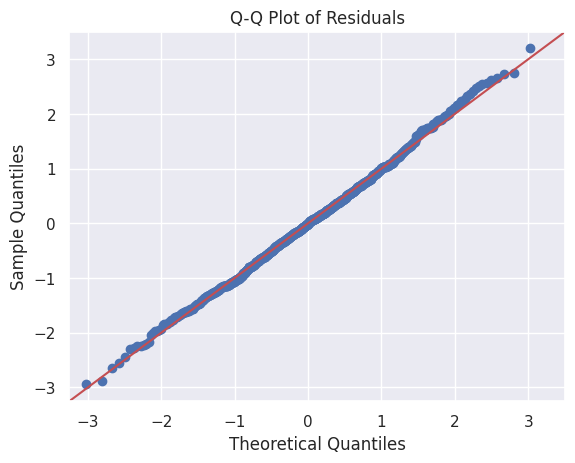

Shapiro-Wilk Test: Test Statistic = 0.9979, p-value = 0.4379
Residuals appear to be normally distributed.

Variance Inflation Factor (VIF):
                Feature        VIF
0              visitors  26.065912
1        ad_impressions  19.731307
2    major_sports_event   1.742907
3         views_trailer   4.511708
4          genre_Comedy   1.939941
5           genre_Drama   2.068384
6          genre_Horror   2.037733
7          genre_Others   3.261380
8         genre_Romance   2.038509
9          genre_Sci-Fi   1.937147
10       genre_Thriller   2.010787
11     dayofweek_Monday   1.076586
12   dayofweek_Saturday   1.228074
13     dayofweek_Sunday   1.202715
14   dayofweek_Thursday   1.281478
15    dayofweek_Tuesday   1.084141
16  dayofweek_Wednesday   1.897971
17        season_Spring   2.011645
18        season_Summer   2.001957
19        season_Winter   2.088696


In [ ]:
# Get residuals and fitted values
y_train_pred = model_pipeline.predict(X_train)
residuals = y_train - y_train_pred

# 1. Linearity and Homoscedasticity: Residuals vs Fitted Values Plot
plt.scatter(y_train_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# 2. Normality of Residuals: Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Normality Test: Shapiro-Wilk Test
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: Test Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Residuals appear to be normally distributed.\n")
else:
    print("Residuals are not normally distributed.\n")

# 4. Multicollinearity: Variance Inflation Factor (VIF)
X_transformed = preprocessor.fit_transform(X_train)
vif_data = pd.DataFrame({
    'Feature': feature_names,
    'VIF': [variance_inflation_factor(X_transformed, i) for i in range(X_transformed.shape[1])]
})
print("Variance Inflation Factor (VIF):")
print(vif_data)


#### **Observations**

1. **Linearity (Residuals vs Fitted Plot)**:


The residuals plot shows points scattered around the horizontal zero line (red dashed line)
There's no clear pattern in the residuals.
This suggests the linearity assumption is met


2. **Normality of Residuals (Q-Q Plot and Shapiro-Wilk Test)**:


  The Q-Q plot shows points following the diagonal red line quite closely.
  **Shapiro-Wilk test** results: **statistic = 0.9979, p-value = 0.4379**
  Since p-value > 0.05, we fail to reject the null hypothesis that residuals are normally distributed
  Both visual and statistical tests strongly support the normality assumption


3. **Multicollinearity (VIF values)**:


Most variables show acceptable VIF values (< 5), except:
**visitors (VIF = 26.07)** and **ad_impressions (VIF = 19.73)** show very high multicollinearity.
This is a concern as these variables are strongly correlated, which could affect coefficient stability and interpretation.
Consider removing one of these variables or combining them into a single metric.


4. **Homoscedasticity (Residuals vs Fitted Plot )**:


The spread of residuals appears consistent across fitted values.
There's no clear funnel or fan shape.
This suggests the homoscedasticity assumption is met.

### Model Performance Evaluation Based On Different Metrics

In [ ]:


# Predictions for train and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Calculate metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = mse_train**0.5
rmse_test = mse_test**0.5

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R-squared calculation for test set
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - k - 1))

# Display results
print("Model Performance Metrics:")

print(f"Train Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.4f}\n")

print(f"Train Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Test Mean Squared Error (MSE): {mse_test:.4f}\n")

print(f"Train Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test:.4f}\n")

print(f"Train R^2 Score: {r2_train:.4f}")
print(f"Test R^2 Score: {r2_test:.4f}\n")

print(f"Adjusted R^2 for Test Set: {adjusted_r2_test:.4f}")


Model Performance Metrics:
Train Mean Absolute Error (MAE): 0.0389
Test Mean Absolute Error (MAE): 0.0399

Train Mean Squared Error (MSE): 0.0024
Test Mean Squared Error (MSE): 0.0025

Train Root Mean Squared Error (RMSE): 0.0489
Test Root Mean Squared Error (RMSE): 0.0500

Train R^2 Score: 0.7868
Test R^2 Score: 0.7743

Adjusted R^2 for Test Set: 0.7661


#### **Observations**

1. **Mean Absolute Error** (MAE)
Train MAE: 0.0389
Test MAE: 0.0399
The MAE values for both train and test sets are very close, indicating that the model generalizes well and is not overfitting or underfitting.
The average prediction error is approximately 0.04, meaning the model predicts values with minimal error.

2. **Mean Squared Error** (MSE)
Train MSE: 0.0024
Test MSE: 0.0025
The MSE values for train and test sets are also very close, further confirming that the model performs similarly on both sets.
The small MSE indicates that the squared errors (and thus large prediction deviations) are minimal.

3. **Root Mean Squared Error** (RMSE)
Train RMSE: 0.0489
Test RMSE: 0.0500
RMSE gives a sense of the average magnitude of the prediction error in the same scale as the target variable.
A small and comparable RMSE for train and test sets suggests a good fit and no significant overfitting.

4. **R-squared**,
Train
𝑅
^ 2
 : 0.7868
Test
𝑅
^2
 : 0.7743
𝑅
^2
  indicates how well the model explains the variability of the dependent variable.
Approximately 78.68% of the variance in the training data and 77.43% of the variance in the test data are explained by the model.
The slight drop in
𝑅
^2
  from train to test is expected and acceptable, indicating no major overfitting.

5. **Adjusted R-squared**
Adjusted
𝑅
^2
  for Test Set: 0.7661
Adjusted
𝑅
^2
  accounts for the number of predictors in the model and penalizes unnecessary predictors.
The small difference between
𝑅
^2
  and adjusted
𝑅
^2
  (0.7743, 0.7743 vs.0.7661, 0.7661) suggests that the predictors in the model are relevant and contribute meaningfully to explaining the target variable.


## **Actionable Insights & Business Recommendation**

### **Overall Assesssment**
  The model performs well on both the train and test datasets, with comparable errors and variance explained.
  The small difference in performance metrics between train and test sets indicates that the model generalizes well and is not overfitting.
  The high
  𝑅
  2
  R
  2
    and adjusted
  𝑅
  2
  R
  2
    values suggest that the model explains a significant proportion of the variance in the target variable.



1. **Visitors (Average visitors in the past week)**:
  High significance:
  The number of visitors to the platform in the past week is a strong predictor of first-day viewership. A higher visitor count indicates a larger engaged audience, directly translating to increased content viewership.
  Business Insight: Boosting platform traffic (e.g., through promotions, partnerships, or improved user experience) in the days leading up to content releases can significantly improve first-day viewership.

2. **Ad Impressions (Number of ad impressions)**:
  Moderate to high significance: Increased ad impressions correlate positively with higher first-day viewership, suggesting that marketing campaigns are effective in driving engagement.
  Business Insight: Prioritize well-targeted ad campaigns with high visibility to ensure new content reaches the maximum audience. Focus on optimizing ad spend to maximize returns.

3. **Major Sports Event**:
  Negative correlation: The presence of a major sports event reduces viewership, likely due to competition for audience attention.
  Business Insight: Avoid scheduling major content releases on days when significant sports events are happening. Use such periods for less critical content or alternative marketing strategies.

4. **Genre**:

  Significant variation: Certain genres perform better than others (e.g., action, drama, comedy). This indicates audience preferences for specific types of content.
  Business Insight: Tailor content production and acquisition strategies toward high-performing genres. For lower-performing genres, consider niche marketing to target specific audience segments.

5. **Day of the Week**:

  Significant impact: Content released on weekends and holidays typically garners higher first-day viewership, likely due to increased free time and leisure activities.
  Business Insight: Strategically schedule major content releases on weekends and public holidays to maximize viewership.

6. **Season of Release**:

  Moderate significance: Seasonal factors (e.g., holiday seasons or summer vacations) affect viewership trends. Content released during popular seasons tends to perform better.
  Business Insight: Capitalize on seasonal trends by aligning content releases with periods of high platform activity.

7. **Trailer Views (Number of trailer views)**:

  Highly significant: Trailer views are directly proportional to first-day viewership, indicating that effective trailers create anticipation and engagement.
  Business Insight: Invest in creating high-quality, engaging trailers to build excitement for upcoming content. Promote trailers across multiple platforms to maximize visibility.

### **Key Takeaways For Business**

1. **Boost Platform Traffic**:

  Increase platform visitors by using strategic campaigns, offering free trials, discounts, or limited-time access to premium content to attract more users.

2. **Optimize Marketing Spend**:

  Focus ad budgets on campaigns for genres and content types that show high potential for viewership. Target platforms and times that align with audience habits to maximize ad impressions.

3. **Strategic Scheduling**:

  Avoid content clashes with major sports events or other high-viewership activities. Release high-priority content on weekends, holidays, or during seasons with higher engagement.

4. **Focus on High-Performing Genres**:

  Double down on producing or acquiring content in genres that consistently perform well. For less popular genres, identify niche audiences and personalize marketing efforts.

5. **Enhance Trailer Effectiveness**:

  Trailers are critical for driving excitement and engagement. Ensure trailers are compelling, well-produced, and promoted on both traditional and social media channels.

6. **Seasonal Campaign Planning**:

  Align major content releases with seasonal periods of higher activity (e.g., holiday seasons or summer vacations) to maximize reach and viewership.

7. **Competitive Landscape**:

  Monitor competitor activity and schedule content releases strategically to avoid head-to-head clashes with major sports events, blockbuster releases, or other high-profile launches.
